In [ ]:
import os.path

In [ ]:
os.getcwd()

`bqplot` is a [Grammar of Graphics](https://www.cs.uic.edu/~wilkinson/TheGrammarOfGraphics/GOG.html) based interactive plotting framework for the Jupyter notebook. The library offers a simple bridge between `Python` and `d3.js` allowing users to quickly and easily build complex GUI's with layered interactions.    

## Basic Plotting 

In [1]:
import pandas as pd

In [2]:
def compound_int_calc(N,r,t):
    return N*(1+r/100)**t

In [3]:
compound_int_calc(100,8,10)

215.89249972727882

In [4]:
y = range(1,40)
results = []
for i in y:
    results.append(compound_int_calc(100,8,i))
df = pd.DataFrame(results)
df

,0
0,108.000000
1,116.640000
2,125.971200
3,136.048896
4,146.932808
5,158.687432
6,171.382427
7,185.093021
8,199.900463
9,215.892500


In [5]:

%matplotlib inline

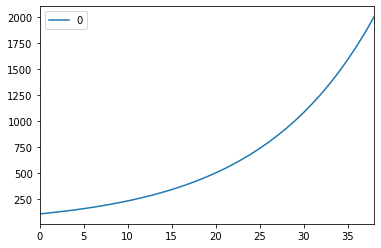

In [6]:
df.plot()

In [7]:
import numpy as np
import bqplot.pyplot as plt

In [12]:
df.head()

,0
0,108.000000
1,116.640000
2,125.971200
3,136.048896
4,146.932808


In [61]:
plt.plot(df[0])


KeyError: 0

In [17]:
plt.show()

In [10]:
from ipywidgets import interact

In [11]:
x = interact(compound_int_calc,N=100, r=8, t = 10)

interactive(children=(IntSlider(value=100, description='N', max=300, min=-100), IntSlider(value=8, description…

In [18]:
size = 100
scale = 100.
np.random.seed(0)
x_data = np.arange(size)
y_data = np.cumsum(np.random.randn(size)  * scale)

In [24]:
# line chart 
fig = plt.figure(title='First Example')
plt.plot(y_data,x_data)
#plt.plot(x_data,y_data)
fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

This image can be saved by calling the `save_png` function of the `Figure` object:

In [23]:
fig.save_png()

Line Chart with dates as x data

In [62]:
dates = np.arange('2005-02', '2005-03', dtype='datetime64[D]')
size = len(dates)
prices = scale + 5 * np.cumsum(np.random.randn(size))

In [63]:
fig = plt.figure(title='Changing Styles', background_style={'fill': 'lightgreen'},
                 title_style={'font-size': '20px','fill': 'DarkOrange'})
axes_options = {'x': {'label': 'Date', 'tick_format': '%m/%d'},
                'y': {'label': 'Price', 'tick_format': '0.0f'}}
plt.plot(dates, prices, 'b', axes_options=axes_options) # third argument is the marker string
fig

Figure(axes=[Axis(label='Date', scale=DateScale(), tick_format='%m/%d'), Axis(label='Price', orientation='vert…

In [128]:
df1 = pd.DataFrame(prices,dates)
df1.reset_index
df1.head()

,0
2005-02-01,105.633180
2005-02-02,100.233522
2005-02-03,94.496179
2005-02-04,92.307079
2005-02-05,89.816916


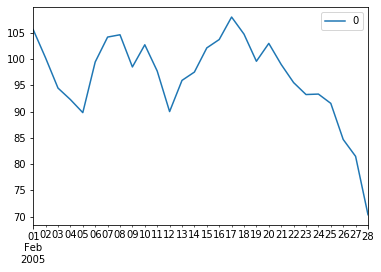

In [129]:
df1.plot()

In [133]:
plt.plot(df1[0])

Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]), y=array([105.63317961, 100.23352207,  94.49617881,  92.30707858,
        89.81691633,  99.4645766 , 104.21168063, 104.64943684,
        98.52225925, 102.74407413,  97.74299739,  90.01914191,
        95.95929087,  97.54400393, 102.14829805, 103.74193631,
       108.02608937, 104.77096141,  99.5997472 , 103.00771979,
        98.99067147,  95.54292258,  93.26526006,  93.35265586,
        91.5826863 ,  84.70792983,  81.48983782,  70.37282206]))

In [132]:
plt.figure()

plt.plot(df1[0])
plt.xlabel('Time')
plt.show()

In [134]:
plt.plot(df.iloc[0])
plt.show()

In [66]:
df2 = pd.DataFrame({
    'dates': dates,
        'prices': prices,
    },
).set_index('dates')
df2.head()

,prices
dates,
2005-02-01,105.633180
2005-02-02,100.233522
2005-02-03,94.496179
2005-02-04,92.307079
2005-02-05,89.816916


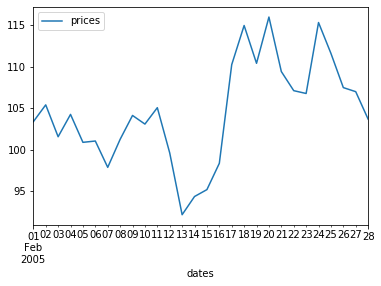

In [60]:
df2.plot()

In [72]:
df2.columns

Index(['prices'], dtype='object')

In [73]:
fig = plt.figure()
plt.plot(df2["prices"])
fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

In [26]:
help(fig)

Help on Figure in module bqplot.figure object:

class Figure(ipywidgets.widgets.domwidget.DOMWidget)
 |  Main canvas for drawing a chart.
 |  
 |  The Figure object holds the list of Marks and Axes. It also holds an
 |  optional Interaction object that is responsible for figure-level mouse
 |  interactions, the "interaction layer".
 |  
 |  Besides, the Figure object has two reference scales, for positioning items
 |  in an absolute fashion in the figure canvas.
 |  
 |  Attributes
 |  ----------
 |  title: string (default: '')
 |      title of the figure
 |  axes: List of Axes (default: [])
 |      list containing the instances of the axes for the figure
 |  marks: List of Marks (default: [])
 |      list containing the marks which are to be appended to the figure
 |  interaction: Interaction or None (default: None)
 |      optional interaction layer for the figure
 |  scale_x: Scale
 |      Scale representing the x values of the figure
 |  scale_y: Scale
 |      Scale representing th

In [64]:
# scatter chart 
fig = plt.figure()
plt.scatter(x_data, y_data, colors=['red'], stroke='black')
fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

In [84]:
# scatter chart 
fig = plt.figure()
axes_options = {'x': {'label': 'Date', 'tick_format': '%m/%d'}, # no dates in x_data used in scatter which is why it only displays it
                'y': {'label': 'Price', 'tick_format': '0.0f'}}

plt.scatter(dates, prices, colors=['red'], stroke='black')
fig

Figure(axes=[Axis(scale=DateScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 6…

In [87]:
# histogramme
fig = plt.figure()
plt.hist(y_data)
fig

Figure(axes=[Axis(orientation='vertical', scale=LinearScale()), Axis(scale=LinearScale())], fig_margin={'top':…

In [90]:
# Bar chart
import string

fig = plt.figure(padding_x=0)
axes_options = {'x': {'label': 'X'}, 'y': {'label': 'Y'}}
plt.bar(x=list(string.ascii_uppercase), y=np.abs(y_data[:20]), axes_options=axes_options)
fig

Figure(axes=[Axis(label='X', scale=OrdinalScale()), Axis(label='Y', orientation='vertical', scale=LinearScale(…

## Pyplot 

In [91]:
from __future__ import print_function
from bqplot import pyplot as plt
from bqplot import topo_load
from bqplot.interacts import panzoom
import numpy as np
import pandas as pd
import datetime as dt

In [92]:
# initializing data to be plotted
np.random.seed(0)
size = 100
y_data = np.cumsum(np.random.randn(size) * 100.0)
y_data_2 = np.cumsum(np.random.randn(size))
y_data_3 = np.cumsum(np.random.randn(size) * 100.)

x = np.linspace(0.0, 10.0, size)

In [93]:
price_data = pd.DataFrame(np.cumsum(np.random.randn(150, 2).dot([[0.5, 0.8], [0.8, 1.0]]), axis=0) + 100,
                          columns=['Security 1', 'Security 2'],
                          index=pd.date_range(start='01-01-2007', periods=150))

symbol = 'Security 1'
dates_all = price_data.index.values
final_prices = price_data[symbol].values.flatten()

In [105]:
cumsumtest = np.arange(5)
df = pd.DataFrame(cumsumtest)
df

,0
0,0
1,1
2,2
3,3
4,4


In [107]:
np.cumsum(df)

,0
0,0
1,1
2,3
3,6
4,10


In [99]:
df = np.cumsum(pd.DataFrame(np.random.randn(150, 2)))
df.head()

,0,1
0,-0.000417,0.374155
1,0.409134,-0.425438
2,1.920774,1.281030
3,2.622557,1.354315
4,2.160663,0.727825


In [110]:
mat = np.arange(0,4)
print(mat)
mat1 = mat.reshape(2,2)
print(mat1)

[0 1 2 3]
[[0 1]
 [2 3]]


In [115]:
df = pd.DataFrame(mat1)
df

,0,1
0,0,1
1,2,3


In [121]:
df.dot([[1, 1], [1, 1]])

,0,1
0,1,1
1,5,5


In [35]:
np.cumsum(np.random.randn(150, 2).dot([[0.5, 0.8], [0.8, 1.0]]),axis=0)

array([[ -0.44135962,  -0.82302466],
       [ -0.72306134,  -1.3404163 ],
       [ -1.89808892,  -3.05524428],
       [ -3.28189347,  -4.80433561],
       [ -3.52763758,  -5.09136488],
       [ -5.44140989,  -7.78849259],
       [ -4.42240506,  -6.40884054],
       [ -4.16454993,  -6.10960564],
       [ -3.78892976,  -5.60090781],
       [ -4.35153647,  -6.079119  ],
       [ -4.31891327,  -5.91995937],
       [ -4.67284252,  -6.40161625],
       [ -5.84137303,  -7.92793013],
       [ -4.41294901,  -6.11031574],
       [ -4.44212355,  -6.1566072 ],
       [ -4.87975271,  -6.82392097],
       [ -4.94286345,  -6.82123027],
       [ -4.84715384,  -6.78100897],
       [ -5.10415892,  -7.26291616],
       [ -3.60603919,  -5.24671018],
       [ -2.5571524 ,  -3.95141854],
       [ -2.83691757,  -4.12010327],
       [ -3.68985774,  -5.39941772],
       [ -3.23321959,  -4.64855633],
       [ -2.29175383,  -3.5768392 ],
       [ -4.00477701,  -5.66790988],
       [ -3.4301642 ,  -4.89414077],
 

In [138]:
price_data.index.names = ['date']

# Simple plots
## Line chart

In [122]:
plt.figure()
plt.plot(x, y_data)
plt.xlabel('Time')
plt.show()

In [123]:
_ = plt.ylabel('Stock Price')
# Setting the title for the current figure
plt.title('Brownian Increments')

In [124]:
plt.figure()
plt.plot('Security 1', data=price_data)
plt.show()

In [135]:
# Scatter Plot 
plt.figure(title='Scatter Plot with colors')
plt.scatter(y_data_2, y_data_3, color=y_data)
plt.show()

In [136]:
# Horizontal and Vertical Lines 
## adding a horizontal line at y=0
plt.hline(0)
## adding a vertical line at x=4 with stroke_width and colors being passed.
plt.vline(4., stroke_width=2, colors=['orangered'])
plt.show()

In [139]:
plt.figure()
plt.scatter('Security 1', 'Security 2', color='date', data=price_data.reset_index(), stroke='Black')
plt.show()

In [34]:
# Historgramme
plt.figure()
plt.hist(y_data, colors=['OrangeRed'])
plt.show()

In [140]:
plt.figure()
plt.hist('Security 1', data=price_data, colors=['MediumSeaGreen'])
plt.xlabel('Hello')
plt.show()

In [141]:
# Bar chart 
plt.figure()
bar_x=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U']
plt.bar(bar_x, y_data_3)
plt.show()

In [142]:
plt.figure()
plt.bar('date', 'Security 2', data=price_data.reset_index()[:10])
plt.show()

In [143]:
# Pie Chart
plt.figure()
d = abs(y_data_2[:5])
plt.pie(d)
plt.show()

In [144]:
plt.figure()
plt.pie('Security 2', color='Security 1', data=price_data[:4])
plt.show()

In [146]:
#from __future__ import print_function # So that this notebook becomes both Python 2 and Python 3 compatible

In [147]:
# OHLC 
dates = np.arange(dt.datetime(2014, 1, 2), dt.datetime(2014, 1, 30), dt.timedelta(days=1))

prices = np.array([[ 187.21  ,  187.4   ,  185.2   ,  185.53  ],
       [ 185.83  ,  187.35  ,  185.3   ,  186.64  ],
       [ 187.15  ,  187.355 ,  185.3   ,  186.    ],
       [ 186.39  ,  190.35  ,  186.38  ,  189.71  ],
       [ 189.33  ,  189.4175,  187.26  ,  187.97  ],
       [ 189.02  ,  189.5   ,  186.55  ,  187.38  ],
       [ 188.31  ,  188.57  ,  186.28  ,  187.26  ],
       [ 186.26  ,  186.95  ,  183.86  ,  184.16  ],
       [ 185.06  ,  186.428 ,  183.8818,  185.92  ],
       [ 185.82  ,  188.65  ,  185.49  ,  187.74  ],
       [ 187.53  ,  188.99  ,  186.8   ,  188.76  ],
       [ 188.04  ,  190.81  ,  187.86  ,  190.09  ],
       [ 190.23  ,  190.39  ,  186.79  ,  188.43  ],
       [ 181.28  ,  183.5   ,  179.67  ,  182.25  ],
       [ 181.43  ,  183.72  ,  180.71  ,  182.73  ],
       [ 181.25  ,  182.8141,  179.64  ,  179.64  ],
       [ 179.605 ,  179.65  ,  177.66  ,  177.9   ],
       [ 178.05  ,  178.45  ,  176.16  ,  176.85  ],
       [ 175.98  ,  178.53  ,  175.89  ,  176.4   ],
       [ 177.17  ,  177.86  ,  176.36  ,  177.36  ]])

plt.figure()
plt.ohlc(dates, prices)
plt.show()

In [42]:
help(plt.boxplot)

Help on function boxplot in module bqplot.pyplot:

boxplot(x, y, **kwargs)
    Draws a boxplot in the current context figure.
    
    Parameters
    ----------
    
    x: numpy.ndarray, 1d
        The x-coordinates of the data points.
    y: numpy.ndarray, 2d
        The data from which the boxes are to be created. Each row of the data
        corresponds to one box drawn in the plot.
    options: dict (default: {})
        Options for the scales to be created. If a scale labeled 'x' is
        required for that mark, options['x'] contains optional keyword
        arguments for the constructor of the corresponding scale type.
    axes_options: dict (default: {})
        Options for the axes to be created. If an axis labeled 'x' is required
        for that mark, axes_options['x'] contains optional keyword arguments
        for the constructor of the corresponding axis type.



In [148]:
# Box Plot
plt.figure()
plt.boxplot(np.arange(10), np.random.randn(10, 100))
plt.show()

In [149]:
import numpy as np
import bqplot as bq

In [150]:
x_data = [1, 2, 3, 4, 5, 6, 7]

y_data = [
    [160.10, 162.34, 161.82, 162.24, 161.44, 158.51, 157.68, 151.93, 151.41, 153.06, 155.38, 161.07, 160.51, 162.99, 161.86, 163.27, 164.05, 164.52, 162.67],
    [161.54, 162.17, 161.95, 161.76, 162.15, 160.92, 160.64, 161.43, 161.89, 164.16, 164.16, 162.79, 161.92, 163.30, 163.49, 162.07, 161.46, 161.82, 162.65],
    [164.40, 164.35, 163.46, 163.60, 161.87, 162.08, 162.18, 161.79, 163.23, 169.10, 182.05, 179.84, 181.75, 183.80, 183.52, 185.93, 186.42, 189.36, 185.71],
    [188.67, 186.91, 187.17, 189.83, 189.64, 190.06, 189.01, 192.31, 191.62, 193.11, 194.00, 193.75, 192.80, 192.96, 191.81, 191.28, 191.72, 191.20, 190.68],
    [191.95, 191.56, 192.30, 192.00, 192.25, 192.99, 191.16, 190.41, 191.23, 190.10, 190.07, 189.36, 187.38, 187.88, 191.81, 191.28, 191.72, 189.99, 190.14],
    [187.95, 187.34, 187.47, 186.63, 184.30, 185.97, 187.10, 189.64, 189.15, 191.67, 194.00, 194.57, 195.78, 194.40, 195.24, 193.63,  190.85, 192.5, 192.49],
    [192.36, 188.49, 189.86, 188.00, 187.70, 188.42, 187.22, 188.04, 188.53, 188.39, 186.35, 181.27, 181.71, 180.37, 180.72, 180.88, 182.14, 181.55, 182.82]
]

In [154]:
plt.Figure()
plt.boxplot(x_data,y_data)
plt.show()

In [156]:
sc_x = bq.LinearScale()
sc_y = bq.LinearScale()

ax_x = bq.Axis(label='X', scale=sc_x, grid_lines='solid')
ax_x.label = "test"

ax_y = bq.Axis(label='Y', scale=sc_y, orientation='vertical')
ax_y.label_location = "middle"
ax_y.label = "nice"
boxes = bq.marks.Boxplot(x=x_data, y=y_data, scales={'x': sc_x, 'y': sc_y}, 
                box_fill_color='gray', outlier_fill_color='black')

fig = bq.Figure(axes=[ax_x, ax_y], marks=[boxes], )
fig.background_style = {"fill":'red'}
fig.legend_style

fig


Figure(axes=[Axis(label='test', scale=LinearScale()), Axis(label='nice', orientation='vertical', scale=LinearS…

In [48]:
fig.legend_text = {'font-size': 20}

In [48]:
fig.save_svg()

In [49]:
x = %pwd
print(x)

C:\Users\alexa\Documents\Python


In [49]:
## setting the stroke and fill_color of the boxes and the outliers
boxes.stroke = 'orange'
boxes.box_fill_color = 'blue'
boxes.outlier_fill_color = 'green'

In [51]:
## changing the opacities of some of the boxes
boxes.opacities = [0.1, 0.2 , 0.5]

In [52]:
## changing the width of the boxes
boxes.box_width=25

In [53]:
boxes.display_legend = True

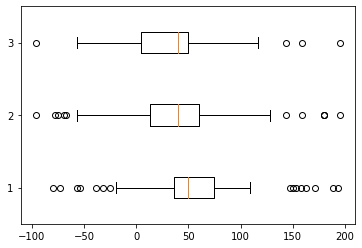

In [157]:
from pylab import *

# from http://matplotlib.org/examples/pylab_examples/boxplot_demo.html

# fake up some data
spread= rand(50) * 100
center = ones(25) * 50
flier_high = rand(10) * 100 + 100
flier_low = rand(10) * -100
data =concatenate((spread, center, flier_high, flier_low), 0)

# fake up some more data
spread= rand(50) * 100
center = ones(25) * 40
flier_high = rand(10) * 100 + 100
flier_low = rand(10) * -100
d2 = concatenate( (spread, center, flier_high, flier_low), 0 )
data.shape = (-1, 1)
d2.shape = (-1, 1)
#data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2,0]]

# multiple box plots on one figure
figure()

# # get dictionary returned from boxplot
bp_dict = boxplot(data, vert=False)

# for line in bp_dict['medians']:
#     # get position data for median line
#     x, y = line.get_xydata()[1] # top of median line
#     # overlay median value
#     text(x, y, '%.1f' % x,
#          horizontalalignment='center') # draw above, centered

# for line in bp_dict['boxes']:
#     x, y = line.get_xydata()[0] # bottom of left line
#     text(x,y, '%.1f' % x,
#          horizontalalignment='center', # centered
#          verticalalignment='top')      # below
#     x, y = line.get_xydata()[3] # bottom of right line
#     text(x,y, '%.1f' % x,
#          horizontalalignment='center', # centered
#              verticalalignment='top')      # below

show()

In [159]:
import bqplot.pyplot as plt

In [160]:
help(plt.geo)

Help on function geo in module bqplot.pyplot:

geo(map_data, **kwargs)
    Draw a map in the current context figure.
    
    Parameters
    ----------
    map_data: string or bqplot.map (default: WorldMap)
        Name of the map or json file required for the map data.
    options: dict (default: {})
        Options for the scales to be created. If a scale labeled 'x' is
        required for that mark, options['x'] contains optional keyword
        arguments for the constructor of the corresponding scale type.
    axes_options: dict (default: {})
        Options for the axes to be created. If an axis labeled 'x' is required
        for that mark, axes_options['x'] contains optional keyword arguments
        for the constructor of the corresponding axis type.



In [188]:
# Map 
plt.figure()
plt.geo(map_data='WorldMap')
plt.show()

In [189]:
marks = plt.current_figure().marks
marks[0].get_state()

{'_model_module': 'bqplot',
 '_model_module_version': '^0.4.5',
 '_model_name': 'MapModel',
 '_view_count': None,
 '_view_module': 'bqplot',
 '_view_module_version': '^0.4.5',
 '_view_name': 'Map',
 'apply_clip': True,
 'color': {},
 'colors': {},
 'display_legend': False,
 'enable_hover': True,
 'hover_highlight': True,
 'hovered_styles': {'hovered_fill': 'Orange',
  'hovered_stroke': None,
  'hovered_stroke_width': 2.0},
 'interactions': {'hover': 'tooltip'},
 'labels': [],
 'map_data': {'type': 'Topology',
  'transform': {'translate': [-180, -90],
   'scale': [0.03600360036003601, 0.017366249624962495]},
  'objects': {'land': {'type': 'MultiPolygon',
    'arcs': [[[0]],
     [[1]],
     [[2]],
     [[3]],
     [[4]],
     [[5]],
     [[6]],
     [[7, 8]],
     [[9, 10]],
     [[11]],
     [[12]],
     [[13]],
     [[14]],
     [[15]],
     [[16]],
     [[17]],
     [[18]],
     [[19]],
     [[20]],
     [[21]],
     [[22]],
     [[23]],
     [[24]],
     [[25]],
     [[26]],
     [[

In [162]:
# Heatmap 
plt.figure(padding_y=0)
plt.heatmap(x * x[:, np.newaxis])
plt.show()

In [163]:
# Grid Heat Map
plt.figure(padding_y=0)
plt.gridheatmap(x[:10] * x[:10, np.newaxis])
plt.show()

In [164]:
# Plotting dates 
plt.figure()
plt.plot(dates_all, final_prices)
plt.show()

# Editing existing axes properties

In [165]:
## adding grid lines and changing the side of the axis in the figure above
plt.axes(options={'x': {'grid_lines': 'solid'}, 'y': {'side': 'right', 'grid_lines': 'dashed'}})

{'x': Axis(scale=DateScale(), side='bottom'),
 'y': Axis(grid_lines='dashed', orientation='vertical', scale=LinearScale(), side='right')}

# Advanced Usage

### Multiple Marks on the same Figure


In [166]:
plt.figure()
plt.plot(x, y_data_3, colors=['orange'])
plt.scatter(x, y_data, stroke='black')
plt.show()

TraitError: Dimension mismatch for trait y of class <class 'bqplot.marks._ScatterBase'>: expected an             array of dimension comprised in interval [1, 1] and got an array of shape (7, 19)

In [167]:
# Using marker strings in Line Chart
mark_x = np.arange(10)
plt.figure(title='Using Marker Strings')
plt.plot(mark_x, 3 * mark_x + 5, 'y-.s') # color=yellow, line_style=dash_dotted, marker=square
plt.plot(mark_x ** 2, 'm:d') # color=magenta, line_style=None, marker=diamond
plt.show()

# Partially changing the scales

In [60]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of programmatic
    plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, hold=None, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        hold : bool, optional, *deprecated*, default: True
        
        detrend : callable, optional, default: `mlab.detrend_none`
            *x* is detrended by the *detrend* callable. Default is no
            normalization.
        
        normed : bool, op

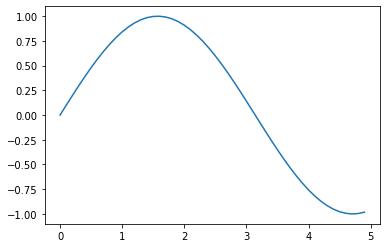

In [169]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.70105133, 0.73024119, 0.75965368, 0.78926407, 0.81904762,
        0.84897959, 0.87903525, 0.90918986, 0.93941868, 0.96969697,
        1.        , 0.96969697, 0.93941868, 0.90918986, 0.87903525,
        0.84897959, 0.81904762, 0.78926407, 0.75965368, 0.73024119,
        0.70105133]),
 <matplotlib.lines.Line2D at 0x24c84533b70>)

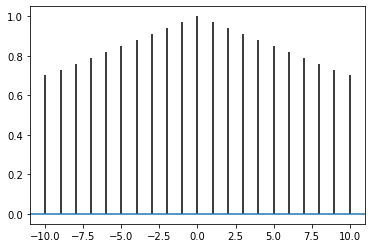

In [170]:
acorr(x)

ValueError: x and y must have same first dimension, but have shapes (50,) and (7, 19)

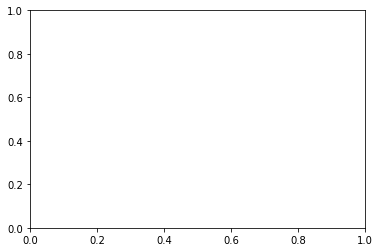

In [171]:
plt.figure()
plt.plot(x, y_data)

## preserving the x scale and changing the y scale
plt.scales(scales={'x': plt.Keep})
plt.plot(x, y_data_2, colors=['orange'], axes_options={'y': {'side': 'right', 'color': 'orange',
                                                             'grid_lines': 'none'}})
plt.show()

# Adding a label to the chart

In [83]:
plt.figure()
line = plt.plot(dates_all, final_prices)
plt.show()

In [84]:
## adds the label to the figure created above
plt.label(['Pie Day'], x=[np.datetime64('2007-03-14')], y=[final_prices.mean()], scales=line.scales,
          colors=['orange'])

Label(colors=['orange'], interactions={'hover': 'tooltip'}, scales={'x': DateScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}}, text=array(['Pie Day'], dtype='<U7'), tooltip_style={'opacity': 0.9}, x=array(['2007-03-14'], dtype='datetime64[D]'), y=array([86.716394]))

### Changing context figure

In [85]:
plt.figure(1)
plt.plot(x,y_data_3)
plt.show() # second line is added below

TraitError: Dimension mismatch for trait x of class <class 'bqplot.marks.Lines'>: expected an             array of dimension comprised in interval [1, 2] and got an array of shape ()

In [86]:
plt.figure(2)
plt.plot(x[:20],y_data_3[:20])
plt.show()

TraitError: Dimension mismatch for trait x of class <class 'bqplot.marks.Lines'>: expected an             array of dimension comprised in interval [1, 2] and got an array of shape ()

# Re-editing first figure

In [87]:
## adds the new line to the first figure
plt.figure(1, title='New title')
plt.plot(x,y_data, colors=['orange']) # already another plt.plot used above 

TraitError: Dimension mismatch for trait x of class <class 'bqplot.marks.Lines'>: expected an             array of dimension comprised in interval [1, 2] and got an array of shape ()

# Viewing the properties of the figure


In [173]:
import bqplot.pyplot as plt

In [178]:
plt.COLOR_CODES

{'b': 'blue',
 'g': 'green',
 'r': 'red',
 'c': 'cyan',
 'm': 'magenta',
 'y': 'yellow',
 'k': 'black'}

In [187]:
plt.string_types

(str,)

In [174]:
marks = plt.current_figure().marks
marks[0].get_state()

{'_model_module': 'bqplot',
 '_model_module_version': '^0.4.5',
 '_model_name': 'LinesModel',
 '_view_count': None,
 '_view_module': 'bqplot',
 '_view_module_version': '^0.4.5',
 '_view_name': 'Lines',
 'apply_clip': True,
 'close_path': False,
 'color': {'values': None, 'type': None},
 'colors': ['yellow'],
 'curves_subset': [],
 'display_legend': False,
 'enable_hover': True,
 'fill': 'none',
 'fill_colors': [],
 'fill_opacities': [],
 'interactions': {'hover': 'tooltip'},
 'interpolation': 'linear',
 'labels': [],
 'labels_visibility': 'none',
 'line_style': 'dash_dotted',
 'marker': 'square',
 'marker_size': 64,
 'opacities': [],
 'preserve_domain': {},
 'scales': {'x': 'IPY_MODEL_cbf45454c2a54139885e36098a999299',
  'y': 'IPY_MODEL_381692eab798458aa4cef75af0fc7cbe'},
 'scales_metadata': {'x': {'orientation': 'horizontal', 'dimension': 'x'},
  'y': {'orientation': 'vertical', 'dimension': 'y'},
  'color': {'dimension': 'color'}},
 'selected': [],
 'selected_style': {},
 'stroke_wid

# Showing a second view of the first figure

In [175]:
plt.show() # cleared below

In [ ]:
### Clearing the figure above
plt.clear()

# Deleting a figure and all its views.

In [ ]:
plt.show(2) # even gives error if closed below (it doesnt exist anymore)

In [ ]:
plt.close(2)

# Interactions in Pyplot

In [195]:
def call_back(name, value):
    print(value)

# Brush Selector 

In [196]:
plt.figure()
plt.scatter(y_data_2, y_data_3, colors=['orange'], stroke='black')

## click and drag on the figure to see the selector
plt.brush_selector(call_back)
plt.show(display_toolbar=False)

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

[[   3.5145697  -106.75830179]
 [   6.13555529  195.07718966]]
[[   3.5145697  -142.56929114]
 [   6.19650844  195.07718966]]
None
[[    2.6002724  -1152.0981859 ]
 [    4.45934358  -548.42714446]]


# Fast interval selector 

In [199]:
plt.figure()
n= 100
plt.plot(np.arange(n), y_data_3)
## click on the figure to activate the selector: below to get Brush selector - here it increases and decreases along the y axes (move up and down)
plt.int_selector(call_back)
plt.show(display_toolbar=True)

## Brush Interval Selector with call back on brushing

In [200]:
# click and drag on chart to make a selection
plt.brush_int_selector(call_back, 'brushing')

BrushIntervalSelector(marks=[Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), y=array([-3.69181838e+01, -6.08561016e+01,  4.91098580e+01,  1.14636231e+02,
        1.78649384e+02,  1.69537793e+01,  1.452116

# Introduction on Bloomberg BQPLOT 

In [201]:
# creating some random data
size = 100
np.random.seed(0)
x_data = np.arange(size)
y_data = np.cumsum(np.random.randn(size)  * 100.0)

Let's start by creating a simple Line chart. `bqplot` has two different APIs, the first one is a `matplotlib` inspired simple API called `pyplot`. So let's import that.

In [202]:
from bqplot import pyplot as plt

Let's plot `y_data` against `x_data`, and then `show` the plot.

In [203]:
plt.figure(title='My First Plot')
plt.plot(x_data, y_data)
plt.show()

Use the buttons above to Pan (or Zoom), Reset or save the Figure.

## Using `bqplot`'s interactive elements

Now, let's try creating a new plot. First, we create a brand new `Figure`. The `Figure` is the final element of any plot that is eventually displayed. You can think of it as a Canvas on which we put all of our other plots.

In [217]:
# Creating a new Figure and setting it's title
plt.figure(title='My Second Chart')

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), scale_…

In [227]:
# Let's assign the scatter plot to a variable: it updates the chart above directly 
scatter_plot = plt.scatter(x_data, y_data)
plt.show()

In [228]:
scatter_plot.enable_move = True

In [209]:
markers = plt.current_figure().marks
markers[0].get_state()

{'_model_module': 'bqplot',
 '_model_module_version': '^0.4.5',
 '_model_name': 'ScatterModel',
 '_view_count': None,
 '_view_module': 'bqplot',
 '_view_module_version': '^0.4.5',
 '_view_name': 'Scatter',
 'apply_clip': True,
 'color': {'values': None, 'type': None},
 'colors': ['steelblue'],
 'default_opacities': [],
 'default_size': 64,
 'default_skew': 0.5,
 'display_legend': False,
 'display_names': True,
 'drag_color': None,
 'drag_size': 5.0,
 'enable_delete': False,
 'enable_hover': True,
 'enable_move': False,
 'fill': True,
 'hovered_point': None,
 'hovered_style': {},
 'interactions': {'hover': 'tooltip'},
 'labels': [],
 'marker': 'circle',
 'names': {'values': None, 'type': None},
 'names_unique': True,
 'opacity': {'values': None, 'type': None},
 'preserve_domain': {},
 'restrict_x': False,
 'restrict_y': False,
 'rotation': {'values': None, 'type': None},
 'scales': {'x': 'IPY_MODEL_07250a69942645b2bec45604112fc021',
  'y': 'IPY_MODEL_6e96a06c562a4ee7a04ff95124a5406e'},


In [210]:
# Let's show the plot
plt.show()

Since both the x and the y attributes of a bqplot chart are interactive widgets, we can change them. So, let's 
change the y attribute of the chart.

In [223]:
scatter_plot.y = np.cumsum(np.random.randn(size)  * 100.0) # text generated below

This is a trait change. Foo was called by the fact that we moved the Scatter
In fact, the Scatter plot sent us all the new data: 
To access the data, try modifying the function and printing the data variable


Re-run the above cell a few times, the same plot should update everytime. But, thats not the only thing that can be changed once a plot has been rendered. Let's try changing some of the other attributes.

In [ ]:
# Say, the color
scatter_plot.colors = ['Red']

In [ ]:
# Or, the marker style
scatter_plot.marker = 'diamond'

It's important to remember that an interactive widget means that the `JavaScript` and the `Python` communicate. So, the plot can be changed through a single line of python code, or a piece of python code can be triggered by a change in the plot. Let's go through a simple example. Say we have a function `foo`:

In [221]:
def foo(change):
    print('This is a trait change. Foo was called by the fact that we moved the Scatter')
    print('In fact, the Scatter plot sent us all the new data: ')
    print('To access the data, try modifying the function and printing the data variable')

We can call `foo` everytime any attribute of our scatter is changed. Say, the `y` values:

In [222]:
# First, we hook up our function `foo` to the colors attribute (or Trait) of the scatter plot
scatter_plot.observe(foo, 'y')

To allow the points in the `Scatter` to be moved interactively, we set the `enable_move` attribute to `True`

In [224]:
scatter_plot.enable_move = True

Go ahead, head over to the chart and move any point in some way. This move (which happens on the `JavaScript` side should trigger our `Python` function `foo`.

In [219]:
plt.show()

# Understanding how bqplot uses the Grammar of Graphics paradigm

`bqplot` has two different APIs. One is the matplotlib inspired `pyplot` which we used above (you can think of it as similar to `qplot` in `ggplot2`). The other one, the verbose API, is meant to expose every element of a plot individually, so that their attriutes can be controlled in an atomic way. In order to truly use `bqplot` to build complex and feature-rich GUIs, it pays to understand the underlying theory that is used to create a plot.

To understand this verbose API, it helps to revisit what exactly the components of a plot are. The first thing we need is a `Scale`.

**A `Scale` is a mapping from (function that converts) data coordinates to figure coordinates.** What this means is that, a `Scale` takes a set of values in any arbitrary unit (say number of people, or $, or litres) and converts it to pixels (or colors for a `ColorScale`).

In [233]:
# First, we import the scales
from bqplot import LinearScale

In [234]:
# Let's create a scale for the x attribute, and a scale for the y attribute
x_sc = LinearScale()
y_sc = LinearScale()

Now, we need to create the actual `Mark` that will visually represent the data. Let's pick a `Scatter` chart to start.

In [235]:
from bqplot import Scatter

In [236]:
scatter_chart = Scatter(x=x_data, y=y_data, scales={'x': x_sc, 'y': y_sc})

Most of the time, the actual `Figure` co-ordinates don't really mean anything to us. So, what we need is the visual representation of our `Scale`, which is called an `Axis`.

In [237]:
from bqplot import Axis

In [238]:
x_ax = Axis(label='X', scale=x_sc)
y_ax = Axis(label='Y', scale=y_sc, orientation='vertical')

And finally, we put it all together on a canvas, which is called a `Figure`.

In [239]:
from bqplot import Figure

In [244]:
fig = Figure(marks=[scatter_chart], title='A Figure', axes=[x_ax, y_ax])
fig

Figure(axes=[Axis(label='X', scale=LinearScale(), side='bottom'), Axis(label='Y', orientation='vertical', scal…

The IPython display machinery displays the last returned value of a cell. If you wish to explicitly display a widget, you can call `IPython.display.display`.

In [246]:
from IPython.display import display

In [247]:
display(fig)

Figure(axes=[Axis(label='X', scale=LinearScale(), side='bottom'), Axis(label='Y', orientation='vertical', scal…

Now, that the plot has been generated, we can control every single attribute of it. Let's say we wanted to color the chart based on some other data.

In [248]:
# First, we generate some random color data.
color_data = np.random.randint(0, 2, size=100)

Now, we define a ColorScale to map the color_data to actual colors

In [249]:
from bqplot import ColorScale

In [250]:
# The colors trait controls the actual colors we want to map to. It can also take a min, mid, max list of
# colors to be interpolated between for continuous data.
col_sc = ColorScale(colors=['MediumSeaGreen', 'Red'])

In [251]:
scatter_chart.scales = {'x': x_sc, 'y': y_sc, 'color': col_sc}
# We pass the color data to the Scatter Chart through it's color attribute
scatter_chart.color = color_data

The grammar of graphics framework allows us to overlay multiple visualizations on a single `Figure` by having the visualization share the `Scales`. So, for example, if we had a `Bar` chart that we would like to plot alongside the `Scatter` plot, we just pass it the same `Scales`.

In [252]:
from bqplot import Bars

In [253]:
new_size = 50
scale = 100.
x_data_new = np.arange(new_size)
y_data_new = np.cumsum(np.random.randn(new_size)  * scale)

In [254]:
# All we need to do to add a bar chart to the Figure is pass the same scales to the Mark
bar_chart = Bars(x=x_data_new, y=y_data_new, scales={'x': x_sc, 'y': y_sc})

Finally, we add the new `Mark` to the `Figure` to update the plot!

In [255]:
fig.marks = [scatter_chart, bar_chart]

# MARKS 

Move to exploring the different `Marks` that you can use to represent your data. You have two options for rendering marks:
* Object Model, which is a verbose API but gives you full flexibility and customizability
* Pyplot, which is a simpler API (similar to matplotlib's pyplot) and sets meaningul defaults for the user

In [256]:
import numpy as np 
from IPython.display import display 
from bqplot import ( OrdinalScale, LinearScale, Bars, Lines, Axis, Figure )
size = 20 
np.random.seed(0)
x_data = np.arange(size)
x_ord = OrdinalScale() 
y_sc = LinearScale()
bar = Bars(x=x_data, y=np.random.randn(2, size), scales={'x': x_ord, 'y': y_sc}, type='stacked')
line = Lines(x=x_data, y=np.random.randn(size), scales={'x': x_ord, 'y': y_sc}, stroke_width=3, colors=['red'], display_legend=True, labels=['Line chart, →'])
ax_x = Axis(scale=x_ord, grid_lines='solid', label='X') 
ax_y = Axis(scale=y_sc, orientation='vertical', tick_format='0.2f', grid_lines='solid', label='Y')
Figure(marks=[bar, line], axes=[ax_x, ax_y], title='API Example', legend_location='bottom-right')


Figure(axes=[Axis(label='X', scale=OrdinalScale()), Axis(label='Y', orientation='vertical', scale=LinearScale(…

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('eVET9IYgbao')